**Wichtig**:  
* Die einzulesenen Datensätze "process_data_df10.csv" und "process_data_df10.pkl" sollen im Ordner "../Data/" sein!
* Alle in diesem Notebook erzeugten Dateien werden auch in "..Data/" gespeichert.


**Notwendige Packages**: numpy, pandas, re, matplotlib, mpu

---

**Important**: 
* The dataframes "process_data_df10" and "process_data_df10.pkl" have to be in the folder "../Data"!
* All the files produced by this notebook will also be saved in "..Data/"


**Necessary Packages**: numpy, pandas, re, matplotlib, mpu


2nd Project part: Feature Engineering and Data Modeling
===

__Data Analytics für Chemieingenieure und Chemiker__

Tino Mundt, M. Sc.

Prof. Dr. Reinhard Schomäcker

__Group C:__

Frank Rudolf Hilden 364571 - Giam Chon Lee 400646 - Philippe Samuel Santos da Costa 369810 - Julian Felipe Torres Campos 402424 - Elron Elias Pens 371555

__26.01.2020__

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Hinzufügen-neuer-Informationen" data-toc-modified-id="Hinzufügen-neuer-Informationen-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Hinzufügen neuer Informationen</a></span><ul class="toc-item"><li><span><a href="#Einlesen-der-daten" data-toc-modified-id="Einlesen-der-daten-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Einlesen der daten</a></span></li><li><span><a href="#Entfernen-von-Reihen-ohne-Produktnamen" data-toc-modified-id="Entfernen-von-Reihen-ohne-Produktnamen-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Entfernen von Reihen ohne Produktnamen</a></span></li><li><span><a href="#Hinzufügen-der-absoluten-und-relativen-Sollwerte" data-toc-modified-id="Hinzufügen-der-absoluten-und-relativen-Sollwerte-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Hinzufügen der absoluten und relativen Sollwerte</a></span></li><li><span><a href="#Speichern-als-.csv" data-toc-modified-id="Speichern-als-.csv-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Speichern als .csv</a></span></li></ul></li><li><span><a href="#Varianz-pro-Produkt" data-toc-modified-id="Varianz-pro-Produkt-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Varianz pro Produkt</a></span><ul class="toc-item"><li><span><a href="#Removing-unnecessary-features-(columns)" data-toc-modified-id="Removing-unnecessary-features-(columns)-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Removing unnecessary features (columns)</a></span></li><li><span><a href="#Removing-incorrect-observations-(rows)" data-toc-modified-id="Removing-incorrect-observations-(rows)-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Removing incorrect observations (rows)</a></span></li><li><span><a href="#Exploring-p_product,-p_product_type-and-p_product_group" data-toc-modified-id="Exploring-p_product,-p_product_type-and-p_product_group-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Exploring <code>p_product</code>, <code>p_product_type</code> and <code>p_product_group</code></a></span></li></ul></li><li><span><a href="#Heat-maps" data-toc-modified-id="Heat-maps-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Heat maps</a></span></li></ul></div>

## Hinzufügen neuer Informationen
Zuerst werden die Reihen ohne Produktnamen aus dem bereits bereinigten Datensatz entfernt. Anschließend werden die absolute und relative Sollwerte für Salzrückhalt und Permeatdurchfluss hinzugefügt. Diese Werte sind in der offiziellen Lawabrane - Broschüre zu finden


### Einlesen der daten

In [2]:
import pandas as pd
import numpy as np
import csv

In [4]:
# Daten einlesen
df=pd.read_csv("./Data/process_data_df10.csv", header=[0,1], na_values=['nan'], sep=',',low_memory=False)

# Spalte ohne Information löschen
df2=df.drop(['Unnamed: 0_level_0'],axis=1)


df2.head()

C:\Users\PhilippeSamuel\Anaconda3\envs\da_chem\lib\site-packages\pandas\core\generic.py:3946: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  new_axis = axis.drop(labels, errors=errors)


ps                                                             \
             ps    ps_datum ps_beschichtete_rollenlange_m ps_c_losung_wt_%   
0  cb031d4b18ff  2018-05-13                        4487.0             31.0   
1  cb031d4b18ff  2018-05-13                        4487.0             31.0   
2  cb031d4b18ff  2018-05-13                        4487.0             31.0   
3  cb031d4b18ff  2018-05-13                        4487.0             31.0   
4  cb031d4b18ff  2018-05-13                        4487.0             31.0   

                                                                       \
  ps_gap_micro_m ps_dicke_as_micro_m ps_dicke_1 ps_dicke_2 ps_dicke_3   
0          250.0               136.0      136.0      134.0      134.0   
1          250.0               136.0      136.0      134.0      134.0   
2          250.0               136.0      136.0      134.0      134.0   
3          250.0               136.0      136.0      134.0      134.0   
4          250.0               136.0      136.0      134.0      134.0   

              ...             qc                                              \
  ps_dicke_4  ... p_product_type p_product_size p_effective_area_per_leaf_m2   
0      135.0  ...   6989995295da              8                       1.4646   
1      135.0  ...   6989995295da              8                       1.4646   
2      135.0  ...   6989995295da              8                       1.4646   
3      135.0  ...   6989995295da              8                       1.4646   
4      135.0  ...   6989995295da              8                       1.4646   

                                                                 \
  p_effective_pressure_bar qc_flux_l/m2/h qc_a-value_l/m2/h/bar   
0                     8.71      40.286235              4.625285   
1                     8.71      40.252401              4.621401   
2                     8.71      39.718186              4.560067   
3                     8.71      39.441426              4.528292   
4                     8.71      39.731817              4.561632   

                                                                    
  qc_b-value_m/s_10-6 qc_flux_m3/m2/day sum_of_scrap roll_position  
0            3.678446          0.966870          0.0     58.181818  
1            3.165247          0.966058          0.0    116.363636  
2            3.170593          0.953236          0.0    174.545455  
3            2.855092          0.946594          0.0    232.727273  
4            2.810373          0.953564          0.0    290.909091  

[5 rows x 343 columns]

### Entfernen von Reihen ohne Produktnamen

In [5]:
# Zu Beginn alle im DataFrame vorkommenden Produktnamen auslesen
produktnamen=list(df2['qc']['p_product_full_name'])

In [6]:
# Erzeugen eines Arrays, in welches die Sollwerte gemäß Herstellerangaben eingetragen werden
sollwerte=np.zeros((118687,2))

In [7]:
# Info zu df2 vor dem Bereinigen
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118687 entries, 0 to 118686
Columns: 343 entries, (ps, ps) to (qc, roll_position)
dtypes: bool(7), float64(296), int64(4), object(36)
memory usage: 305.0+ MB


In [8]:
# Produktnamen laut Herstellerangaben
# Stimmt der Produktname überein, werden die Sollwerte für den Salrückhalt (linke Spalte) und den Permatdurchsatz (rechte Spalte) eingetragen
# leere Spalten werden in der else-Bedingung aussortiert

for i in range(len(produktnamen)):
    if produktnamen[i]=='a79cf6a73839':
        sollwerte[i]=[99.8, 5.2]
        
    elif produktnamen[i]=='c807697b3c7e':
        sollwerte[i]=[99.8, 24.6]
        
    elif produktnamen[i]=='f22a7fef71c5':
        sollwerte[i]=[99.8, 27.3] 
        
    elif produktnamen[i]=='c13b2f69d3c1':
        sollwerte[i]=[99.8, 7.2]  
        
    elif produktnamen[i]=='3e94b7067349':
        sollwerte[i]=[99.8, 34.1]  
        
    elif produktnamen[i]=='3394d82edc97':
        sollwerte[i]=[99.8, 37.5]  
        
    elif produktnamen[i]=='df9e75b29918':
        sollwerte[i]=[99.7, 39.9]  
        
    elif produktnamen[i]=='316c8d1ffca1':
        sollwerte[i]=[99.5, 43.9]  
        
    elif produktnamen[i]=='5661014763c8':
        sollwerte[i]=[99.5, 8.9]  
        
    elif produktnamen[i]=='73928f2577b5':
        sollwerte[i]=[99.7, 39.9]  
        
    elif produktnamen[i]=='22227b31350f':
        sollwerte[i]=[99.5, 41.5]  
        
    elif produktnamen[i]=='df1d09e643af':
        sollwerte[i]=[99.7, 8.9]  
        
    elif produktnamen[i]=='e2b1e6e1d5f5':
        sollwerte[i]=[99.7, 37.9]  
        
    elif produktnamen[i]=='54b98d0fe2eb':
        sollwerte[i]=[99.5, 41.7]
        
    elif produktnamen[i]=='ff16223eb2bf':
        sollwerte[i]=[99.5, 39.9]
        
    elif produktnamen[i]=='0cc0ba87b12f':
        sollwerte[i]=[99.5, 7.4]        
        
    elif produktnamen[i]=='a640f68db89c':
        sollwerte[i]=[99.5, 34.8]        
        
    elif produktnamen[i]=='b3ccc5e5f9b5':
        sollwerte[i]=[99.5, 36.2]        
        
    elif produktnamen[i]=='2256f65c362b':
        sollwerte[i]=[99.5, 38.3]        
        
    elif produktnamen[i]=='33d21930e431':
        sollwerte[i]=[99.5, 8.2]        
        
    elif produktnamen[i]=='3a0c28c7fc8c':
        sollwerte[i]=[99.5, 38.6]                
        
    elif produktnamen[i]=='630448a85ca3':
        sollwerte[i]=[99.5, 42.6]
    else:
        print(i)
        df2=df2.drop(df2.index[i])
        
        

9723
11598
15501
17752
32413
39389
49116
55882
68301
68491
77866
80634
88800
99333
101312
115985
117371


In [9]:
# Info zu df2 nach dem Bereinigen
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118670 entries, 0 to 118686
Columns: 343 entries, (ps, ps) to (qc, roll_position)
dtypes: bool(7), float64(296), int64(4), object(36)
memory usage: 305.9+ MB


### Hinzufügen der absoluten und relativen Sollwerte

In [10]:
# Erzeugen eines Backups
sollwerte_b=np.copy(sollwerte)
sollwerte_b

array([[99.5, 36.2],
       [99.5, 36.2],
       [99.5, 36.2],
       ...,
       [99.5, 36.2],
       [99.5, 36.2],
       [99.5, 36.2]])

In [11]:
# Sollwerte als Array auslesen:
# sollwerte2=Salrückhalt
# sollwerte3=Permatdurchfluss
sollwerte2=sollwerte_b[:,0]
sollwerte3=sollwerte_b[:,1]

In [12]:
# Typvereinfachung -> Teilen einer Liste durch eine Liste (später)
sollwerte_salzr=sollwerte2.tolist()
sollwerte_durchf=sollwerte3.tolist()

In [13]:
# Erneut Überprüfen, ob keine leeren Einträge vorhanden sind
sollwerte_salzr=list(filter(lambda a: a!=0, sollwerte_salzr))
sollwerte_durchf=list(filter(lambda a: a!=0, sollwerte_durchf))

In [14]:
# istwerte als Liste auslesen
ist_salzr=df2['qc']['qc_salzrckhalt']
ist_durchf=df2['qc']['qc_durchfluss']

In [15]:
# relative Abweichung berechnen
# negative %-Zahl: weniger als Sollwert; positive %-Zahl: mehr als der Sollwert
Abw_salzr=(ist_salzr-sollwerte_salzr)/sollwerte_durchf*100
Abw_durchf=(ist_durchf-sollwerte_durchf)/sollwerte_durchf*100

In [16]:
# Hinzufügen der Sollwerte zum DataFrame
df2['Sollwerte','soll_salzr_abs']=sollwerte_salzr
df2['Sollwerte','soll_permeatd_abs']=sollwerte_durchf
df2['Sollwerte', 'soll_salzr_rel']=Abw_salzr
df2['Sollwerte', 'soll_permeatd_rel']=Abw_durchf

In [17]:
df2.head()

ps                                                             \
             ps    ps_datum ps_beschichtete_rollenlange_m ps_c_losung_wt_%   
0  cb031d4b18ff  2018-05-13                        4487.0             31.0   
1  cb031d4b18ff  2018-05-13                        4487.0             31.0   
2  cb031d4b18ff  2018-05-13                        4487.0             31.0   
3  cb031d4b18ff  2018-05-13                        4487.0             31.0   
4  cb031d4b18ff  2018-05-13                        4487.0             31.0   

                                                                       \
  ps_gap_micro_m ps_dicke_as_micro_m ps_dicke_1 ps_dicke_2 ps_dicke_3   
0          250.0               136.0      136.0      134.0      134.0   
1          250.0               136.0      136.0      134.0      134.0   
2          250.0               136.0      136.0      134.0      134.0   
3          250.0               136.0      136.0      134.0      134.0   
4          250.0               136.0      136.0      134.0      134.0   

              ...             qc                                            \
  ps_dicke_4  ... qc_flux_l/m2/h qc_a-value_l/m2/h/bar qc_b-value_m/s_10-6   
0      135.0  ...      40.286235              4.625285            3.678446   
1      135.0  ...      40.252401              4.621401            3.165247   
2      135.0  ...      39.718186              4.560067            3.170593   
3      135.0  ...      39.441426              4.528292            2.855092   
4      135.0  ...      39.731817              4.561632            2.810373   

                                                    Sollwerte  \
  qc_flux_m3/m2/day sum_of_scrap roll_position soll_salzr_abs   
0          0.966870          0.0     58.181818           99.5   
1          0.966058          0.0    116.363636           99.5   
2          0.953236          0.0    174.545455           99.5   
3          0.946594          0.0    232.727273           99.5   
4          0.953564          0.0    290.909091           99.5   

                                                      
  soll_permeatd_abs soll_salzr_rel soll_permeatd_rel  
0              36.2      -0.123927          1.707208  
1              36.2       0.083994          1.621790  
2              36.2       0.064419          0.273103  
3              36.2       0.186600         -0.425610  
4              36.2       0.213790          0.307515  

[5 rows x 347 columns]

In [18]:
df2['Sollwerte']

,soll_salzr_abs,soll_permeatd_abs,soll_salzr_rel,soll_permeatd_rel
0,99.5,36.2,-0.123927,1.707208
1,99.5,36.2,0.083994,1.621790
2,99.5,36.2,0.064419,0.273103
3,99.5,36.2,0.186600,-0.425610
4,99.5,36.2,0.213790,0.307515
...,...,...,...,...
118682,99.5,36.2,-0.262752,-8.737486
118683,99.5,36.2,-0.129304,-10.007924
118684,99.5,36.2,-0.255097,-11.920763
118685,99.5,36.2,-0.041934,-4.767057


### Speichern als .csv

In [19]:
df2.to_csv('process_data_df11.csv')

## Varianz pro Produkt

In [20]:
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [6,5]
pd.options.display.max_columns = None
sns.set(style="ticks", color_codes=True)

In [21]:
df = pd.read_pickle('./Data/process_data_df10.pkl')

### Removing unnecessary features (columns)
`pa_coating` is a dummy variable and doesn't belong to the original collected data. For further analysis it can be dropped.

In [22]:
n_rows = df.shape[0]
# select columns that have more than 90% of missing values
manyNaNs = [col[1] for col in df.columns if df[col].isna().sum()/n_rows > 0.9]

colsToRemove = ['pa_coating'] + manyNaNs

# drop the selected columns
df1 = df.copy()
df1.drop(labels=colsToRemove,axis='columns',level=1,inplace=True)

# Let's check whether the variables where succesfully removed:

# Check if any elements of colsToRemove is in df
print('Are any of the `colsToRemove` in `df`?')
print('  ',any([i for i in colsToRemove if i in df.columns.get_level_values(level=1)]))
print('\n')

# Check if any elements of colsToRemove is in df1
print('Are any of the `colsToRemove` in `df1`?')
print('  ',any([i for i in colsToRemove if i in df1.columns.get_level_values(level=1)]))

Are any of the `colsToRemove` in `df`?
   True


Are any of the `colsToRemove` in `df1`?
   False


### Removing incorrect observations (rows)

In [23]:
df2 = df1.copy()
# Removes the first level of the multiindex 
df2 = df2.droplevel(level= 0, axis='columns')
# Remove observations where `qc_salzrckhalt` == 0 or `qc_durchfluss` == 0
df2.query('qc_salzrckhalt>0 & qc_durchfluss>0',inplace=True)

In [24]:
df2.dtypes.value_counts()

float64                294
object                  15
datetime64[ns, UTC]     10
datetime64[ns]           9
bool                     7
int64                    4
category                 1
dtype: int64

### Exploring `p_product`, `p_product_type` and `p_product_group` 
Now we could keep removing unnecessary columns, but let's focus on the feature we want to keep/analyse. 

The 1st question is: 
> Do the features `qc_salzrckhalt` and `qc_durchfluss` vary significantly among different `p_product`, `p_product_type` and `p_product_group`? 

In [25]:
groupCols = ['p_product_group','p_product_type','p_product']
goalCols  = ['qc_salzrckhalt','qc_durchfluss']

XY = df2.loc[:,['nr'] + groupCols + goalCols]

In [29]:
(XY
 .groupby(groupCols)[goalCols]
 .describe(percentiles=[.5])
 .loc[:,(slice(None),['mean','std'])]
)

# Or more generally:
# groupCols = ['p_product_group','p_product_type','p_product']
# goalCols  = ['qc_salzrckhalt','qc_durchfluss']

# (XY
#  .groupby(groupCols)[goalCols]
#  .describe()
# )

qc_salzrckhalt            \
                                                           mean       std   
p_product_group     p_product_type p_product                                
Brackwasserelemente 5200bdfc01a1   B400 HP            99.710801  0.178502   
                                   B440 HP            99.680525  0.274059   
                    6989995295da   B085 LE 4040       99.587711  0.558698   
                                   B400 LE            99.597574  0.817313   
                                   B400 LE ASD        99.594492  0.408559   
                                   B440 LE            99.655607  0.705622   
                    6d2830b1e76d   B085 HF 4040       99.747199  0.851215   
                                   B400 HF            99.725208  0.606740   
                                   B440 HF            99.709252  0.423277   
                    c77cb1692e0e   B085 ULP 4040      99.481307  0.127754   
                                   B400 ULP ASD       99.447599  2.260389   
                                   B440 ULP           99.487571  2.190241   
                    f187928fdb22   B370 FR            99.754400  0.531778   
                                   B400 FR ASD        99.778475  0.111351   
                    f8ba29e9058b   B085 FR 4040       99.751843  0.569136   
                                   B400 FR            99.698430  0.943967   
Seewasserelemente   320144db7b4b   S085 HF 4040       99.593242  0.322570   
                                   S400 HF            99.661606  0.121766   
                                   S440 HF            99.564647  0.250485   
                    cd7216b44ce3   S085 HR 4040       99.622799  0.192800   
                                   S400 HR            99.550429  0.283806   
                                   S440 HR            99.673094  0.126316   

                                                 qc_durchfluss            
                                                          mean       std  
p_product_group     p_product_type p_product                              
Brackwasserelemente 5200bdfc01a1   B400 HP           47.430731  4.933277  
                                   B440 HP           54.348608  6.059473  
                    6989995295da   B085 LE 4040       7.868664  0.783317  
                                   B400 LE           36.109638  2.457657  
                                   B400 LE ASD       38.475563  3.242915  
                                   B440 LE           41.042630  4.313453  
                    6d2830b1e76d   B085 HF 4040      10.217395  1.450472  
                                   B400 HF           45.837838  5.614436  
                                   B440 HF           47.629521  4.765416  
                    c77cb1692e0e   B085 ULP 4040      8.316075  0.941071  
                                   B400 ULP ASD      41.915975  6.179667  
                                   B440 ULP          46.233789  6.493993  
                    f187928fdb22   B370 FR           40.967887  3.688570  
                                   B400 FR ASD       46.994425  2.782082  
                    f8ba29e9058b   B085 FR 4040      10.180787  1.228733  
                                   B400 FR           45.075786  5.419690  
Seewasserelemente   320144db7b4b   S085 HF 4040       7.158628  0.425344  
                                   S400 HF           34.972416  5.160947  
                                   S440 HF           39.709322  3.077885  
                    cd7216b44ce3   S085 HR 4040       6.344866  0.827814  
                                   S400 HR           28.270457  4.239466  
                                   S440 HR           25.871263  1.561641

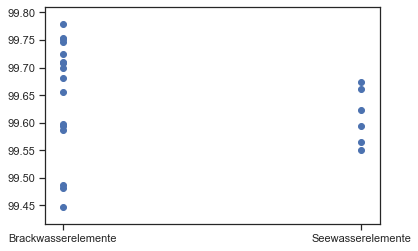

In [30]:
groupCols = ['p_product_group','p_product_type','p_product']
goalCols  = ['qc_salzrckhalt','qc_durchfluss']

XY_mean = XY.groupby(groupCols)[goalCols].mean()
XY_std  = XY.groupby(groupCols)[goalCols].std()

smry= XY_mean.join(XY_std,
      lsuffix='_mean',
      rsuffix='_std')

dir(smry.index)

smry.index.get_level_values(level='p_product_group')

fig1 = plt.figure(figsize=[6,4])
plt.scatter(smry.index.get_level_values(level='p_product_group'),smry['qc_salzrckhalt_mean'])
plt.show()

In [19]:
#sns.catplot(y='p_product_type',x='qc_salzrckhalt',hue='p_product_group',data=XY)
sns.catplot(y='p_product',x='qc_salzrckhalt',hue='p_product_type',data=XY[XY['p_product_group'] == 'Brackwasserelemente'])
plt.show()

NameError: name 'XY' is not defined

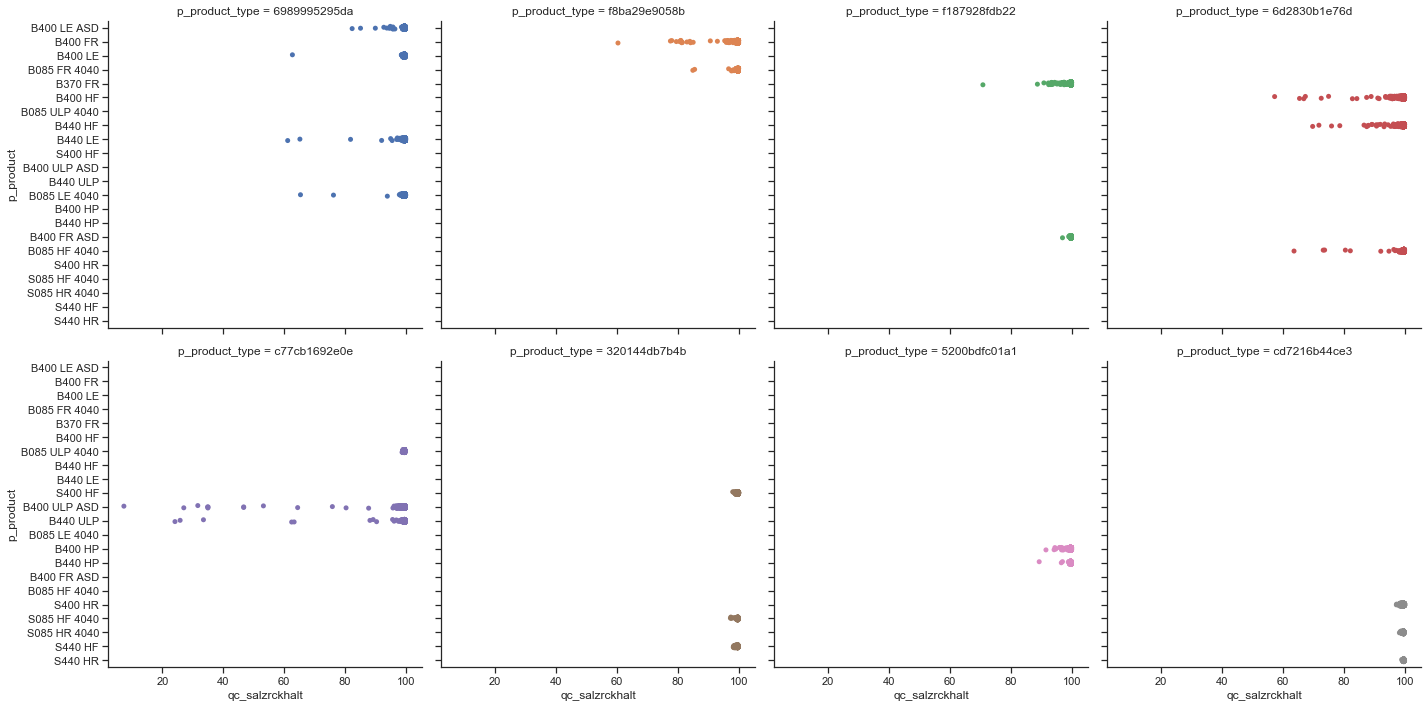

In [32]:
(XY
 .dropna()                   # drop missing values
 .pipe((sns.catplot,'data'),
       y='p_product',x='qc_salzrckhalt',col='p_product_type',col_wrap = 4,hue='p_product_type',kind='strip'))

plt.show()

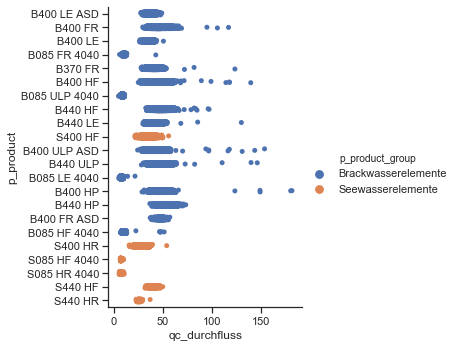

In [33]:
(XY
 .dropna()
 .pipe((sns.catplot,'data'),
       x='qc_durchfluss',y='p_product',hue='p_product_group'))
plt.show()

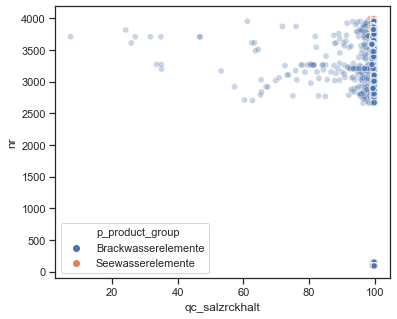

In [34]:
fig, ax = plt.subplots()
ax = (XY
 .query("qc_salzrckhalt>0")
 .dropna()
 .pipe((sns.scatterplot,'data'),
       x='qc_salzrckhalt',y='nr',hue='p_product_group',alpha=0.3))
plt.show()

## Heat maps

In [2]:
#import the libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #Data Visualization 
import seaborn as sns  #Python library for Vidualization
import sklearn
import csv

In [3]:
# Daten einlesen
df=pd.read_csv("process_data_df11.csv", header=[0,1], na_values=['nan'],
sep=',',low_memory=False)

# Spalte ohne Information löschen
df2=df.drop(['Unnamed: 0_level_0'],axis=1)


df2.head()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:3946: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  new_axis = axis.drop(labels, errors=errors)


ps                                                             \
             ps    ps_datum ps_beschichtete_rollenlange_m ps_c_losung_wt_%   
0  cb031d4b18ff  2018-05-13                        4487.0             31.0   
1  cb031d4b18ff  2018-05-13                        4487.0             31.0   
2  cb031d4b18ff  2018-05-13                        4487.0             31.0   
3  cb031d4b18ff  2018-05-13                        4487.0             31.0   
4  cb031d4b18ff  2018-05-13                        4487.0             31.0   

                                                                       \
  ps_gap_micro_m ps_dicke_as_micro_m ps_dicke_1 ps_dicke_2 ps_dicke_3   
0          250.0               136.0      136.0      134.0      134.0   
1          250.0               136.0      136.0      134.0      134.0   
2          250.0               136.0      136.0      134.0      134.0   
3          250.0               136.0      136.0      134.0      134.0   
4          250.0               136.0      136.0      134.0      134.0   

              ...             qc                                            \
  ps_dicke_4  ... qc_flux_l/m2/h qc_a-value_l/m2/h/bar qc_b-value_m/s_10-6   
0      135.0  ...      40.286235              4.625285            3.678446   
1      135.0  ...      40.252401              4.621401            3.165247   
2      135.0  ...      39.718186              4.560067            3.170593   
3      135.0  ...      39.441426              4.528292            2.855092   
4      135.0  ...      39.731817              4.561632            2.810373   

                                                    Sollwerte  \
  qc_flux_m3/m2/day sum_of_scrap roll_position soll_salzr_abs   
0          0.966870          0.0     58.181818           99.5   
1          0.966058          0.0    116.363636           99.5   
2          0.953236          0.0    174.545455           99.5   
3          0.946594          0.0    232.727273           99.5   
4          0.953564          0.0    290.909091           99.5   

                                                      
  soll_permeatd_abs soll_salzr_rel soll_permeatd_rel  
0              36.2      -0.123927          1.707208  
1              36.2       0.083994          1.621790  
2              36.2       0.064419          0.273103  
3              36.2       0.186600         -0.425610  
4              36.2       0.213790          0.307515  

[5 rows x 347 columns]

In [4]:
df3=df2.copy()

In [5]:
df3=df3.select_dtypes(include=['float64','int'])

In [6]:
df3=df3[(df3['Sollwerte']['soll_salzr_rel']>-10) & (df3['Sollwerte']['soll_salzr_rel']>-100)]

In [7]:
df3_ps=df3.drop(columns=['pa','ass','qc'])
df3_pa=df3.drop(columns=['ps','ass','qc'])
df3_ass=df3.drop(columns=['ps','pa','qc'])
df3_qc=df3.drop(columns=['ps','pa','ass'])
df3_ps.head()

ps                                  \
  ps_beschichtete_rollenlange_m ps_c_losung_wt_% ps_gap_micro_m   
0                        4487.0             31.0          250.0   
1                        4487.0             31.0          250.0   
2                        4487.0             31.0          250.0   
3                        4487.0             31.0          250.0   
4                        4487.0             31.0          250.0   

                                                                               \
  ps_dicke_as_micro_m ps_dicke_1 ps_dicke_2 ps_dicke_3 ps_dicke_4 ps_dicke_bs   
0               136.0      136.0      134.0      134.0      135.0       134.0   
1               136.0      136.0      134.0      134.0      135.0       134.0   
2               136.0      136.0      134.0      134.0      135.0       134.0   
3               136.0      136.0      134.0      134.0      135.0       134.0   
4               136.0      136.0      134.0      134.0      135.0       134.0   

                              ...                                       \
  ps_raum_temperatur_start_c  ... ps_auftragswerk_feuchtigkeit_3600m_%   
0                       24.0  ...                                 72.0   
1                       24.0  ...                                 72.0   
2                       24.0  ...                                 72.0   
3                       24.0  ...                                 72.0   
4                       24.0  ...                                 72.0   

                                                            \
  ps_auftragswerk_feuchtigkeit_4200m_% ps_out_m ps_scrap_%   
0                                 67.0   4487.0   2.456522   
1                                 67.0   4487.0   2.456522   
2                                 67.0   4487.0   2.456522   
3                                 67.0   4487.0   2.456522   
4                                 67.0   4487.0   2.456522   

                                                Sollwerte                    \
  ps_f_auftragswerk_median ps_dicke_median soll_salzr_abs soll_permeatd_abs   
0                     78.0           134.5           99.5              36.2   
1                     78.0           134.5           99.5              36.2   
2                     78.0           134.5           99.5              36.2   
3                     78.0           134.5           99.5              36.2   
4                     78.0           134.5           99.5              36.2   

                                    
  soll_salzr_rel soll_permeatd_rel  
0      -0.123927          1.707208  
1       0.083994          1.621790  
2       0.064419          0.273103  
3       0.186600         -0.425610  
4       0.213790          0.307515  

[5 rows x 37 columns]

In [8]:
df3_ps

ps                                  \
       ps_beschichtete_rollenlange_m ps_c_losung_wt_% ps_gap_micro_m   
0                             4487.0             31.0          250.0   
1                             4487.0             31.0          250.0   
2                             4487.0             31.0          250.0   
3                             4487.0             31.0          250.0   
4                             4487.0             31.0          250.0   
...                              ...              ...            ...   
118665                        2202.0             31.0          250.0   
118666                        2202.0             31.0          250.0   
118667                        2202.0             31.0          250.0   
118668                        2202.0             31.0          250.0   
118669                        2202.0             31.0          250.0   

                                                                        \
       ps_dicke_as_micro_m ps_dicke_1 ps_dicke_2 ps_dicke_3 ps_dicke_4   
0                    136.0      136.0      134.0      134.0      135.0   
1                    136.0      136.0      134.0      134.0      135.0   
2                    136.0      136.0      134.0      134.0      135.0   
3                    136.0      136.0      134.0      134.0      135.0   
4                    136.0      136.0      134.0      134.0      135.0   
...                    ...        ...        ...        ...        ...   
118665               137.0      135.0      133.0      133.0      132.0   
118666               137.0      135.0      133.0      133.0      132.0   
118667               137.0      135.0      133.0      133.0      132.0   
118668               137.0      135.0      133.0      133.0      132.0   
118669               137.0      135.0      133.0      133.0      132.0   

                                               ...  \
       ps_dicke_bs ps_raum_temperatur_start_c  ...   
0            134.0                       24.0  ...   
1            134.0                       24.0  ...   
2            134.0                       24.0  ...   
3            134.0                       24.0  ...   
4            134.0                       24.0  ...   
...            ...                        ...  ...   
118665       132.0                       24.0  ...   
118666       132.0                       24.0  ...   
118667       132.0                       24.0  ...   
118668       132.0                       24.0  ...   
118669       132.0                       24.0  ...   

                                             \
       ps_auftragswerk_feuchtigkeit_3600m_%   
0                                      72.0   
1                                      72.0   
2                                      72.0   
3                                      72.0   
4                                      72.0   
...                                     ...   
118665                                  0.0   
118666                                  0.0   
118667                                  0.0   
118668                                  0.0   
118669                                  0.0   

                                                                 \
       ps_auftragswerk_feuchtigkeit_4200m_% ps_out_m ps_scrap_%   
0                                      67.0   4487.0   2.456522   
1                                      67.0   4487.0   2.456522   
2                                      67.0   4487.0   2.456522   
3                                      67.0   4487.0   2.456522   
4                                      67.0   4487.0   2.456522   
...                                     ...      ...        ...   
118665                                  0.0   2202.0   4.260870   
118666                                  0.0   2202.0   4.260870   
118667                                  0.0   2202.0   4.260870   
118668                                  0.0   2202.0   4.260870   
118669         

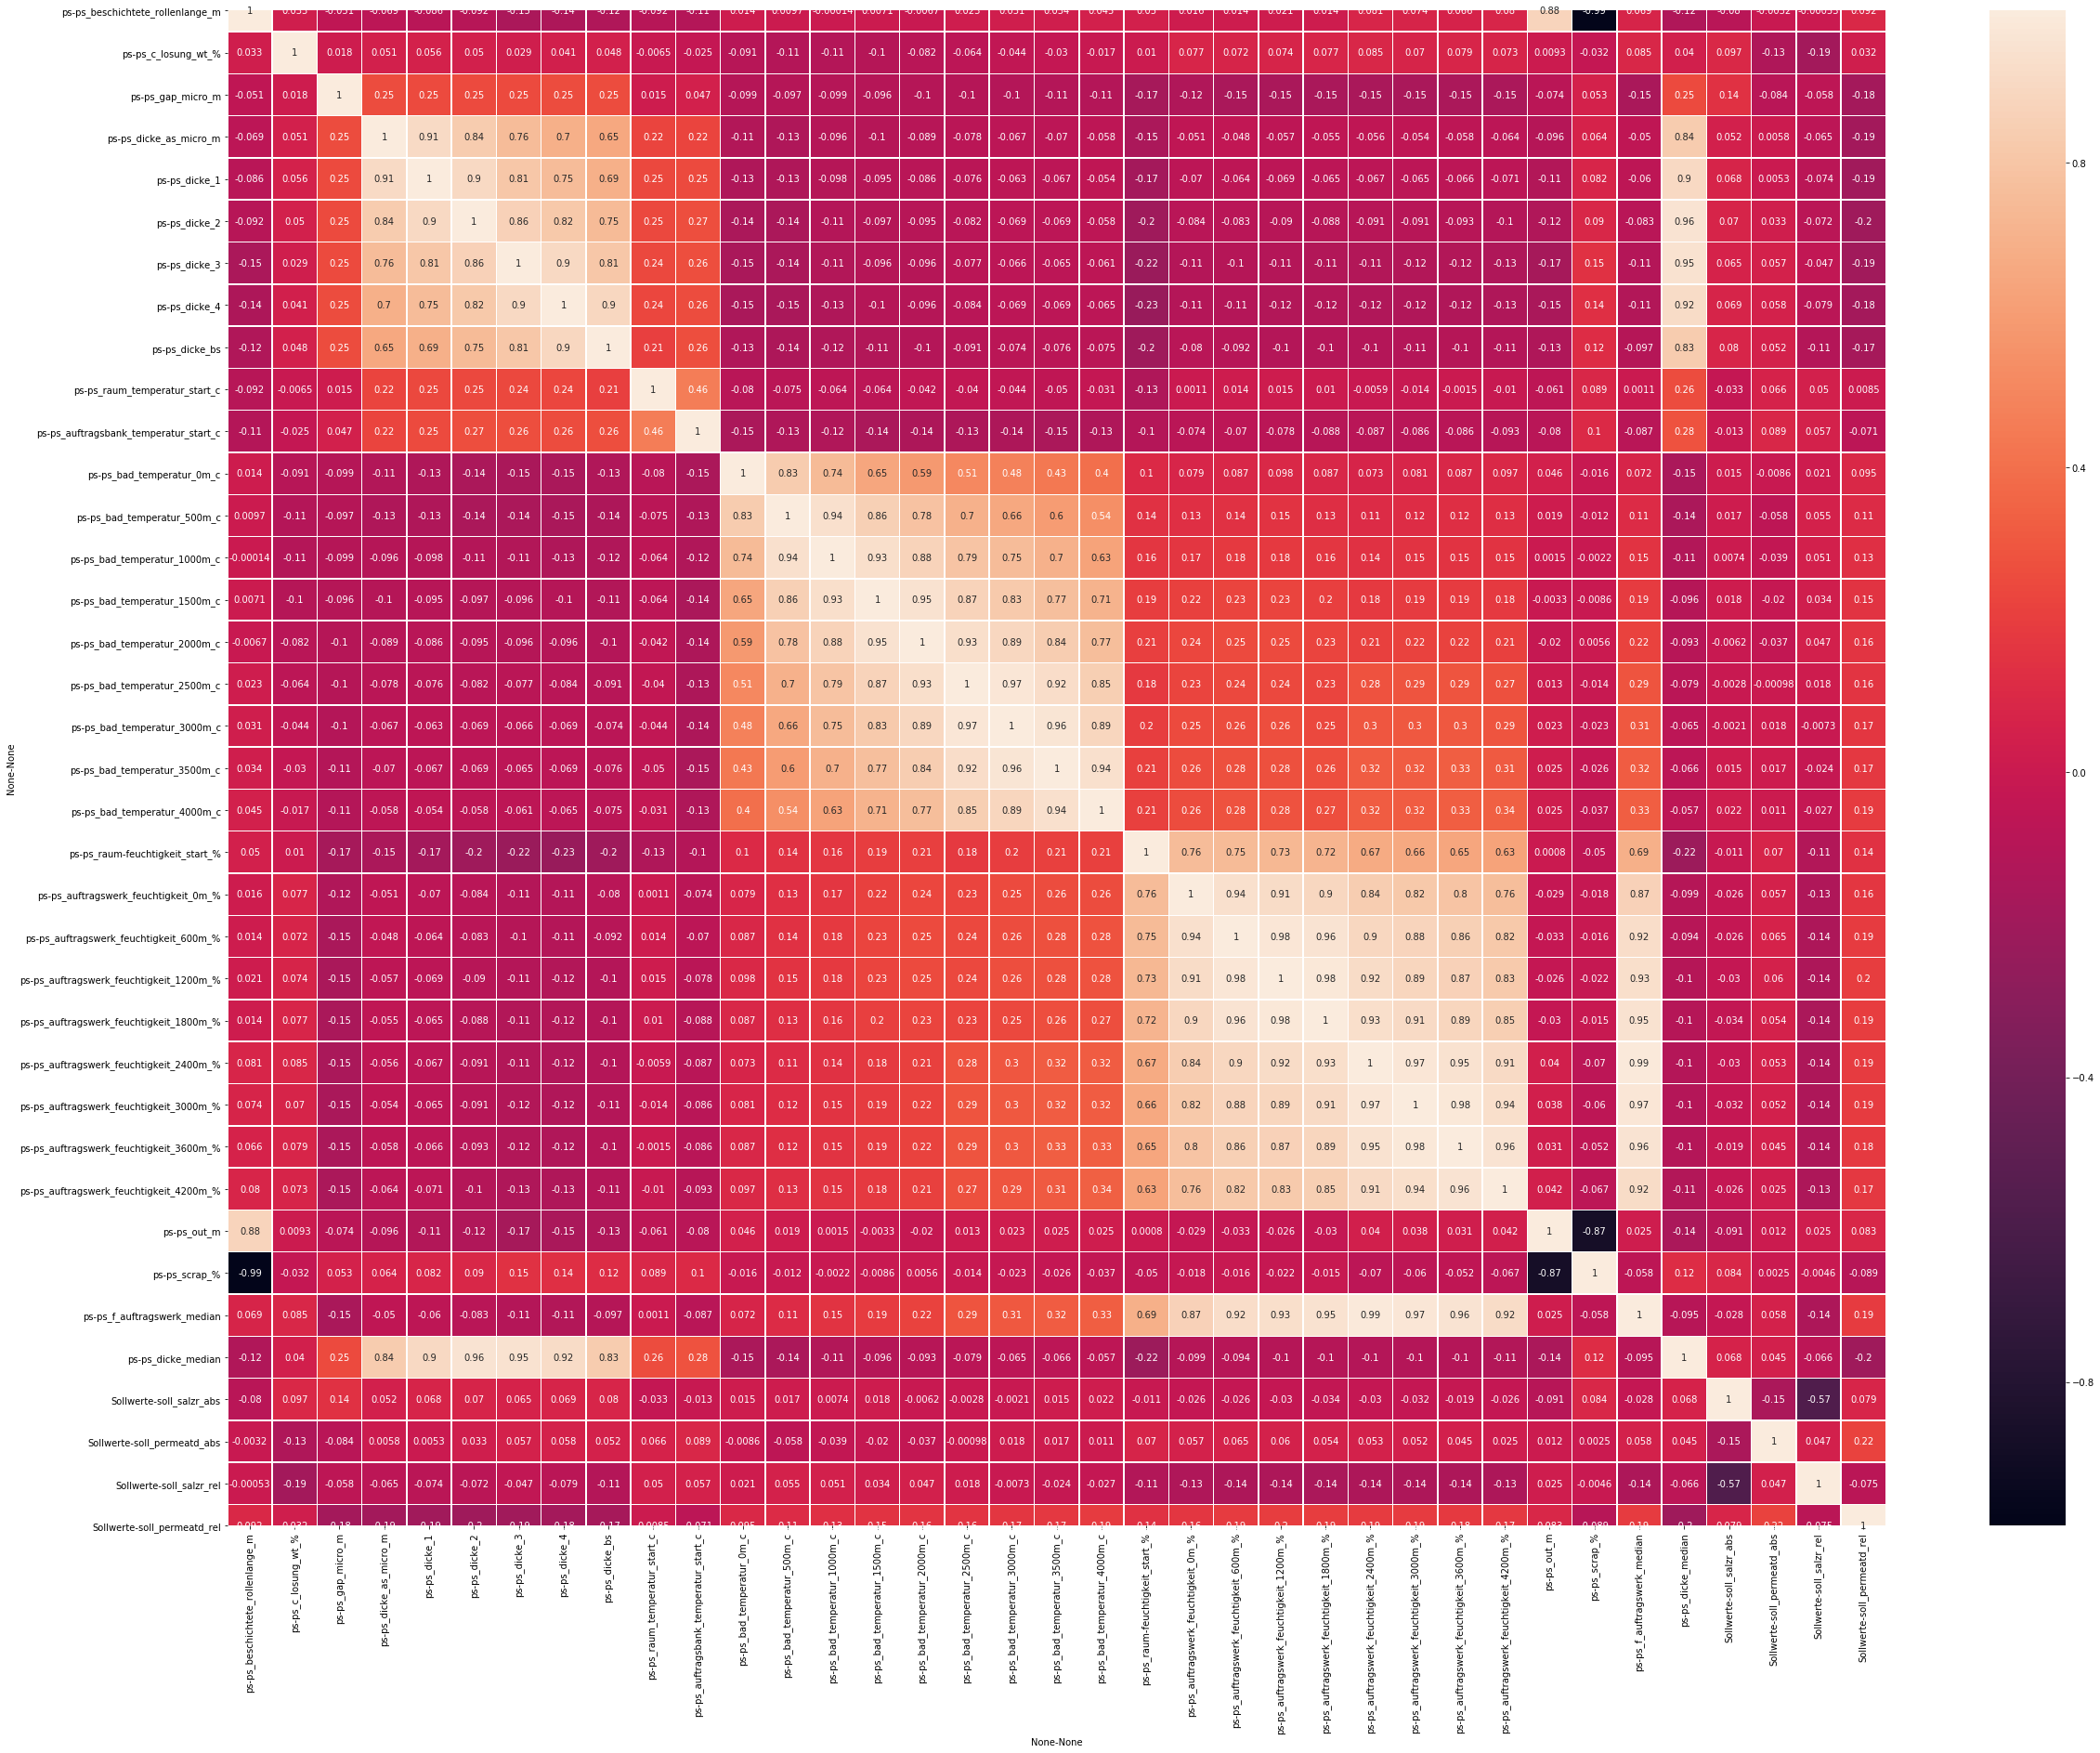

In [9]:
plt.figure(figsize=(40, 30))
p = sns.heatmap(df3_ps.corr(method='spearman'), annot=True, linewidths=.5)
plt.savefig('df3_ps.pdf')

In [ ]:
plt.figure(figsize=(100, 80))
p = sns.heatmap(df3_pa.corr(method='spearman'), annot=True, linewidths=.8)
plt.savefig('df3_pa.pdf')

In [ ]:
plt.figure(figsize=(80, 60))
p = sns.heatmap(df3_ass.corr(method='spearman'), annot=True, linewidths=.5)
plt.savefig('df3_ass.pdf')

In [ ]:
plt.figure(figsize=(40, 30))
p = sns.heatmap(df3_qc.corr(method='spearman'), annot=False, linewidths=.5)
plt.savefig('df3_qc.pdf')

# Summary and plan of attack:

Different regressionmodels will be tested to see if the value and variance of the choosed target variable 'qc_salzrckhalt' can be predicted. To appy regression models the dataset needs to be reduced in feature size.

Firstly the dataset will be reduced in feature size, this means that unneccasarry features will be removed. Comments will explain why a feature is regarded as not important. Secondly new features will be created. Comments will explain why this feature has been created.

##### Required moduls: 

- statsmodels
- pandas
- numpy


In [2]:
# Import needed libaries
import pandas as pd
import os
import numpy as np


# read in dataset and remove previouly set multiindex
df = pd.read_csv("process_data_df10.csv", header=[0,1], na_values=['nan'],
sep=',',low_memory=False)

# delet column without any information 
df.drop(['Unnamed: 0_level_0'],axis=1, inplace = True)
df = df.droplevel(level=0,axis=1)

# drop na and duplicates from qc_serien number since following assumption is made:
# every qc has one serial number, if it occurs twice the sample has been tested twice, since there are
# less than 1000 duplicates (less than 0.5 % of whole dataset) to keep them
df = df.dropna(subset = ['qc_serien_nummer']).drop_duplicates(subset = ['qc_serien_nummer'])#.set_index('qc_serien_nummer')
df

/home/elron/anaconda3/envs/da/lib/python3.7/site-packages/pandas/core/generic.py:3946: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  new_axis = axis.drop(labels, errors=errors)


,ps,ps_datum,ps_beschichtete_rollenlange_m,ps_c_losung_wt_%,ps_gap_micro_m,ps_dicke_as_micro_m,ps_dicke_1,ps_dicke_2,ps_dicke_3,ps_dicke_4,...,p_product_size,p_effective_area_per_leaf_m2,p_effective_pressure_bar,qc_flux_l/m2/h,qc_a-value_l/m2/h/bar,qc_b-value_m/s_10-6,qc_flux_m3/m2/day,sum_of_scrap,roll_position,p_Product_type_group
0,cb031d4b18ff,2018-05-13,4487.0,31.0,250.0,136.0,136.0,134.0,134.0,135.0,...,8,1.4646,8.71,40.286235,4.625285,3.678446,0.966870,0.0,58.181818,Low Energy
1,cb031d4b18ff,2018-05-13,4487.0,31.0,250.0,136.0,136.0,134.0,134.0,135.0,...,8,1.4646,8.71,40.252401,4.621401,3.165247,0.966058,0.0,116.363636,Low Energy
2,cb031d4b18ff,2018-05-13,4487.0,31.0,250.0,136.0,136.0,134.0,134.0,135.0,...,8,1.4646,8.71,39.718186,4.560067,3.170593,0.953236,0.0,174.545455,Low Energy
3,cb031d4b18ff,2018-05-13,4487.0,31.0,250.0,136.0,136.0,134.0,134.0,135.0,...,8,1.4646,8.71,39.441426,4.528292,2.855092,0.946594,0.0,232.727273,Low Energy
4,cb031d4b18ff,2018-05-13,4487.0,31.0,250.0,136.0,136.0,134.0,134.0,135.0,...,8,1.4646,8.71,39.731817,4.561632,2.810373,0.953564,0.0,290.909091,Low Energy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118682,3fa606fdd9e8,2018-05-14,2202.0,31.0,250.0,137.0,135.0,133.0,133.0,132.0,...,8,1.4646,8.71,36.149091,4.150297,3.606951,0.867578,0.0,0.000000,Low Energy
118683,3fa606fdd9e8,2018-05-14,2202.0,31.0,250.0,137.0,135.0,133.0,133.0,132.0,...,8,1.4646,8.71,35.645870,4.092522,3.266436,0.855501,0.0,0.000000,Low Energy
118684,3fa606fdd9e8,2018-05-14,2202.0,31.0,250.0,137.0,135.0,133.0,133.0,132.0,...,8,1.4646,8.71,34.888194,4.005533,3.464832,0.837317,0.0,0.000000,Low Energy
118685,3fa606fdd9e8,2018-05-14,2202.0,31.0,250.0,137.0,135.0,133.0,133.0,132.0,...,8,1.4646,8.71,37.721778,4.330859,3.255691,0.905323,0.0,0.000000,Low Energy


#### 2. remove all richtwert and ref columns into seperate dataframe

- Richtwert and Ref are not measured during the different processes, therefore they can be removed to a seperate dataframe

In [3]:
df1 = df.copy()
result = pd.concat([df1.filter(regex = '_ref'), df1.filter(regex = '_richtwert_')], axis = 1, sort = False)
result1 = result.loc[:,~result.columns.duplicated()]
#result1 = result1.join(identdf)
#result1.to_pickle('Richtwert_ref_variables_dataset.pkl')
df1.drop(result1, axis = 1, inplace = True)

#### 3. make mean column and drop the columns the mean is made from
- Creation of mean columns as features and dropping of multiple measurement columns. No outliers are removed.

In [5]:
df2 = df1.copy()

# Multiple Measurment columns
meanList = ['pa_cm-pda','pa_chlorkonzentration','pa_air-knife_vor_amin_bad','airknife_vor_amin_trockner',
            'pa_amin-trockner_feuchtigkeit_danfugt_bs','pa_amin-trockner_feuchtigkeit_danfugt_as','pa_amin-trockner_feuchtigkeit_cofely',
            'ps_dicke','ps_bad_temperatur','ps_auftragswerk_feuchtigkeit','sc_d_links_werte','sc_d_rechts_werte']


# Funktion to drop multiple measurment values
def MeanColumnCreate(meanList, df):
  for i in meanList:
      filterdf = df.filter(regex = i)
      name = i+"_mean"
      df[name] = filterdf.iloc[:].mean(axis = 1)
      df.drop(filterdf, axis = 1, inplace = True)

In [6]:
MeanColumnCreate(meanList, df2)
#df2.to_pickle('process_data_mean_columns_added')

#### 4. remove all median columns 
- The median can be created on demand if needed, therefore the median columns are removed

In [7]:
df3 = df2.copy()
df3.drop(df3.filter(regex = 'median'), axis = 1, inplace = True)

#### 5. remove all datetimes columns 
- The hypothesis testing, see other notebook does not depend on the date, therefore this columns are dropped

In [8]:
df4 = df3.copy()
dfdate = df4.select_dtypes(include = ['datetime64']).join(df4[['reaction_end','reaction_start']])
df4.drop(dfdate, axis = 1, inplace = True)

#### 6. remove all columns with the keyword datum

In [9]:
df5 = df4.copy()
df5.drop(df5.filter(regex = 'datum'), axis = 1, inplace = True)

#### 7. drop of certain columns, for detail see comments

In [10]:
dropList = ['qc_maximalersalzrueckhalt','qc_breite','sc_d_links_anz_max','sc_d_rechts_anz_min',
            'sc_d_rechts_anz_max','qc_barcode_leak_test_values', 'ps','pa_coating','nr','pa_mpda_lsg','pa_chlorlsg','pa_sbs_lsg',
            'pa_alkalilsg','p_product_size','p_effective_area_per_leaf_m2','p_product_type', 'pa_beschichtete_rollenlange_m','pp_actual_product',
           'pp_actual_product_short_name','pp_plan_ausbeute_elemente', 'pp_plan_product', 'pp_product_short_name',
           'qc_p_position','roll_position','winding_product_short_name','winding_product_type','assembled_in_elements_m', 'winding_product_line',
           'qc_mstaerke','qc_nachkommadurchfluss','qc_temperaturc', 'pa_tmc_gehalt_%']

df6 = df5.copy()
for i in dropList:
    df6.drop(i, axis = 1, inplace = True)
# qc_maximalersalzruckhalt : just two values 0 and 99.99 
# qc_breite : just two values 985 and 0
# sc_d_links_anz_max : because has 118639 zero values (0.04 % are not zero)
# sc_d_rechts_anz_min : has 118674 (> 99.9%) zeros
# sc_d_rechts_anz_max  : has 118528 (99.9%) zeros
# qc_barcode_leak_test : categorical variable not fully understood
# ps : categorical variable not fully understood
# pa_coating : dummy variable
# nr : not necessary for linear regression
# all ending with lsg : seems to be container numbers for the reaction solution, no details are known about these containers
# p_product_size [1.4646, 1.3914, 0] is a recoding of p_effective_area_per_leaf_m2 [8, 4, 0]
# p_product_full_name : categorical variable, which contains same information as p_product_type
# p_product_type : renamed with more clear name aka B400 ULP, therefore dropped
# all pp_ : are subsets of categorical variables of p_product
# qc_p_position','roll_position','winding_product_short_name','winding_product_type' all categorical variable
# qc_mstaerke constant value : 0.13
# qc_nachkommadurchfluss constant values : 1 
# qc_temperaturc  constant value : 25
# pa_tmc_gehalt_% : contains more than 60% Nas

#### 8. Target variables
- Following variables are target variables, because they have the most distinct values and their names indicate, that e.g qc_durchfluss means flow through the membrane a important quality trait

#### 9. Updating the dataset
When we look at the below list we see that for example pa_staub-sauger columns have only two values and that greater 0 mean on, so we set that condition to True and 0 is set as False for columns with this name pattern.
Also the column actual usage will be converted into boolean, usage = True , trash = False
Drop of qc_ph since it is assumed it only shows which pH values was choosen for the qc.
Drop of qc_rundunggpd since it is assumed to only indicate how to round
Drop of qc_nachommarueckhalt since it is assumed it only shows how many decimals are shown for salzrckhalt

In [11]:
# selecting categorical variables
# Following assumption is made : Remove or review features that have low Variation: 
# if the feature has mostly same values, it is highly likely that the model is not going to learn anything from it.
# we assume that features less than 10 unique values should be looked at and then maybe removed 
uniqueList = list((df6.loc[:,df6.nunique()<10]).columns)
for i in uniqueList:
    print('{} has {} as unique numbers'.format(i,df6[i].unique()))
len(uniqueList) #56 for <10

ps_c_losung_wt_% has [ 31. 310.  33.] as unique numbers
ps_gap_micro_m has [250. 280.] as unique numbers
pa_bahn-geschwindigkeit_m/min has [ 9. 12.  6.] as unique numbers
pa_bad-wechsel_m-pda has [False  True] as unique numbers
pa_bad-wechsel_hw1 has [False  True] as unique numbers
pa_bad-wechsel_hw2 has [ True False] as unique numbers
pa_bad-wechsel_chlor has [False  True] as unique numbers
pa_bad-wechsel_hw3 has [False  True] as unique numbers
pa_ce-capro_lactam_% has [ 0.   16.6   2.4   4.    0.67  0.16  0.12] as unique numbers
pa_temperatur_chlorbad_start_c has [20.  21.  22.  19.  18.   0.  17.  22.4] as unique numbers
pa_amin-trockner_temperatur_danfugt_c has [30. 35. 65. 25. 33.  0. 36. 27. 32.] as unique numbers
pa_decan-trockner_geblase_ende_% has [  0.  80.  85. 100.  65.   5.  88.  30.  92.] as unique numbers
pa_staub-sauger_1_vor_aminbad_0_aus_>0_an has [  0. 100.] as unique numbers
pa_staub-sauger_2_nach_aminbad has [  0. 100.] as unique numbers
pa_staub-sauger_3_zw5_vor_h

56

In [12]:
paStaubSaugerList = list(df6.filter(regex = 'pa_staub-sauger').columns)
paStaubSaugerList
for i in paStaubSaugerList:
    df6[i] = df6[i].map({100. : True, 0. : False})
df6.filter(regex = 'pa_staub-sauger')
df7 = df6.copy()

In [13]:
df7['pp_actual_usage'].replace({'use':True, 'trash':False}, inplace = True)

In [14]:
df7.drop(['qc_ph','qc_nachkommasalzrueckhalt','qc_rundunggpd'],axis = 1, inplace = True)

In [15]:
df7.select_dtypes(include =['float64', 'int'])

,ps_beschichtete_rollenlange_m,ps_c_losung_wt_%,ps_gap_micro_m,ps_raum_temperatur_start_c,ps_auftragsbank_temperatur_start_c,ps_raum-feuchtigkeit_start_%,ps_out_m,ps_scrap_%,pa_bahn-geschwindigkeit_m/min,pa_raum_temperatur_start_c,...,pa_air-knife_vor_amin_bad_mean,airknife_vor_amin_trockner_mean,pa_amin-trockner_feuchtigkeit_danfugt_bs_mean,pa_amin-trockner_feuchtigkeit_danfugt_as_mean,pa_amin-trockner_feuchtigkeit_cofely_mean,ps_dicke_mean,ps_bad_temperatur_mean,ps_auftragswerk_feuchtigkeit_mean,sc_d_links_werte_mean,sc_d_rechts_werte_mean
0,4487.0,31.0,250.0,24.0,19.0,57.0,4487.0,2.456522,9.0,24.0,...,80.0,40.00,57.0,56.0,79.8500,134.785714,21.688889,75.625,0.0,0.0
1,4487.0,31.0,250.0,24.0,19.0,57.0,4487.0,2.456522,9.0,24.0,...,80.0,40.00,57.0,56.0,79.8500,134.785714,21.688889,75.625,0.0,0.0
2,4487.0,31.0,250.0,24.0,19.0,57.0,4487.0,2.456522,9.0,24.0,...,80.0,40.00,57.0,56.0,79.8500,134.785714,21.688889,75.625,0.0,0.0
3,4487.0,31.0,250.0,24.0,19.0,57.0,4487.0,2.456522,9.0,24.0,...,80.0,40.00,57.0,56.0,79.8500,134.785714,21.688889,75.625,0.0,0.0
4,4487.0,31.0,250.0,24.0,19.0,57.0,4487.0,2.456522,9.0,24.0,...,80.0,40.00,57.0,56.0,79.8500,134.785714,21.688889,75.625,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118682,2202.0,31.0,250.0,24.0,19.0,46.0,2202.0,4.260870,9.0,23.4,...,40.0,18.75,35.8,34.4,39.7875,133.571429,12.300000,27.625,0.0,0.0
118683,2202.0,31.0,250.0,24.0,19.0,46.0,2202.0,4.260870,9.0,23.4,...,40.0,18.75,35.8,34.4,39.7875,133.571429,12.300000,27.625,0.0,0.0
118684,2202.0,31.0,250.0,24.0,19.0,46.0,2202.0,4.260870,9.0,23.4,...,40.0,18.75,35.8,34.4,39.7875,133.571429,12.300000,27.625,0.0,0.0
118685,2202.0,31.0,250.0,24.0,19.0,46.0,2202.0,4.260870,9.0,23.4,...,40.0,18.75,35.8,34.4,39.7875,133.571429,12.300000,27.625,0.0,0.0


#### 10. recoding of boolean to be used in linear regression

In [16]:
dfnumeric = df7.select_dtypes(include = ['float64','int'])
dfnumeric

,ps_beschichtete_rollenlange_m,ps_c_losung_wt_%,ps_gap_micro_m,ps_raum_temperatur_start_c,ps_auftragsbank_temperatur_start_c,ps_raum-feuchtigkeit_start_%,ps_out_m,ps_scrap_%,pa_bahn-geschwindigkeit_m/min,pa_raum_temperatur_start_c,...,pa_air-knife_vor_amin_bad_mean,airknife_vor_amin_trockner_mean,pa_amin-trockner_feuchtigkeit_danfugt_bs_mean,pa_amin-trockner_feuchtigkeit_danfugt_as_mean,pa_amin-trockner_feuchtigkeit_cofely_mean,ps_dicke_mean,ps_bad_temperatur_mean,ps_auftragswerk_feuchtigkeit_mean,sc_d_links_werte_mean,sc_d_rechts_werte_mean
0,4487.0,31.0,250.0,24.0,19.0,57.0,4487.0,2.456522,9.0,24.0,...,80.0,40.00,57.0,56.0,79.8500,134.785714,21.688889,75.625,0.0,0.0
1,4487.0,31.0,250.0,24.0,19.0,57.0,4487.0,2.456522,9.0,24.0,...,80.0,40.00,57.0,56.0,79.8500,134.785714,21.688889,75.625,0.0,0.0
2,4487.0,31.0,250.0,24.0,19.0,57.0,4487.0,2.456522,9.0,24.0,...,80.0,40.00,57.0,56.0,79.8500,134.785714,21.688889,75.625,0.0,0.0
3,4487.0,31.0,250.0,24.0,19.0,57.0,4487.0,2.456522,9.0,24.0,...,80.0,40.00,57.0,56.0,79.8500,134.785714,21.688889,75.625,0.0,0.0
4,4487.0,31.0,250.0,24.0,19.0,57.0,4487.0,2.456522,9.0,24.0,...,80.0,40.00,57.0,56.0,79.8500,134.785714,21.688889,75.625,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118682,2202.0,31.0,250.0,24.0,19.0,46.0,2202.0,4.260870,9.0,23.4,...,40.0,18.75,35.8,34.4,39.7875,133.571429,12.300000,27.625,0.0,0.0
118683,2202.0,31.0,250.0,24.0,19.0,46.0,2202.0,4.260870,9.0,23.4,...,40.0,18.75,35.8,34.4,39.7875,133.571429,12.300000,27.625,0.0,0.0
118684,2202.0,31.0,250.0,24.0,19.0,46.0,2202.0,4.260870,9.0,23.4,...,40.0,18.75,35.8,34.4,39.7875,133.571429,12.300000,27.625,0.0,0.0
118685,2202.0,31.0,250.0,24.0,19.0,46.0,2202.0,4.260870,9.0,23.4,...,40.0,18.75,35.8,34.4,39.7875,133.571429,12.300000,27.625,0.0,0.0


#### 11. MultiCorrelation check with VIF, checks for multicollinearity

In [17]:
# multiple regression
mask = dfnumeric['qc_salzrckhalt']!=0
dfnumeric = dfnumeric[mask]

X =dfnumeric.drop('qc_salzrckhalt', axis =1)
y =dfnumeric['qc_salzrckhalt']

In [18]:
# Implementing VIF
from patsy import dmatrices
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [20]:
# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

In [21]:
#vif.max(10)
test = vif['VIF Factor'] > 5   #rule of thumb suggested https://pvanb.wordpress.com/2016/04/25/vif-stepwise-variable-selection/
#pd.DataFrame(np.sort(vif.values)[:,-1:], columns=['2nd-largest','largest'])
test1 = vif[test]
test1.shape
vifList = []
for i in test1['features']:
    vifList.append(i)

In [22]:
len(vifList)

92

In [23]:
for i in vifList:
    df7.drop(i, axis = 1, inplace = True)

    df7.to_pickle('data_process_for_first_model_test')

In [24]:
df8 = df7.copy()

#### 12. Determine if there is remaining correlation between the features and features and target variable

- 1. Pearson
- 2. Spearman
- 3. Kendall

only variables which show high correlation in all of them will be removed

In [25]:
dfnumeric = df7.select_dtypes(include = ['float64','int'])
# Pearson correlation test for numeric variables
import numpy as np
corr_matrix = dfnumeric.corr(method = 'pearson')
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
# Find index of feature columns with correlation greater than 0.90
to_drop_pearson = [column for column in upper.columns if any(upper[column] > 0.90)]
to_drop_pearson  

[]

In [26]:
dfnumeric.corr(method = 'pearson')['qc_salzrckhalt'].sort_values(ascending = False) 

qc_salzrckhalt                                         1.000000
qc_lasttest                                            0.305255
pa_amin-trockner_temperatur_danfugt_c                  0.017324
ct1_anfang_0m_%                                        0.015969
ps_bad_temperatur_mean                                 0.010372
ct1_ende_4300m_rej_%                                   0.007610
pa_amin-trockner_feuchtigkeit_cofely_mean              0.006599
ps_gap_micro_m                                         0.005839
ps_auftragswerk_feuchtigkeit_mean                      0.005568
pa_decan-trockner_geblase_start_%                      0.004078
pa_air-knife_vor_amin_bad_mean                         0.002950
pa_ctmc_%                                              0.002440
pa_cm-pda_mean                                         0.002429
ct1_ende_flux_m3/m2/d                                  0.001763
pa_decan-trockner_geblase_ende_%                       0.000967
sc_l_leak_hand                          

In [27]:
corr_matrix = dfnumeric.corr(method = 'kendall')
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
# Find index of feature columns with correlation greater than 0.90
to_drop_kendall = [column for column in upper.columns if any(upper[column] > 0.90)]
to_drop_kendall 

[]

In [28]:
dfnumeric.corr(method = 'kendall')['qc_salzrckhalt'].sort_values(ascending = False) 

qc_salzrckhalt                                         1.000000
pa_amin-trockner_temperatur_danfugt_c                  0.340491
pa_cm-pda_mean                                         0.223506
pa_amin-trockner_feuchtigkeit_cofely_mean              0.143591
ct1_anfang_0m_%                                        0.136676
ct1_ende_4300m_rej_%                                   0.130369
ct1_ende_flux_m3/m2/d                                  0.114502
pa_amin-trockner_temperatur_cofely_c                   0.096939
pa_temperatur_n-decan-lsg_chem_vorbereitung_start_c    0.076761
pa_ctmc_%                                              0.069684
ps_auftragsbank_temperatur_start_c                     0.058633
ps_gap_micro_m                                         0.045165
qc_lasttest                                            0.043236
pa_temperatur_m-pda-bad_c                              0.037297
pp_sequence_aw2_winding                                0.035545
pa_air-knife_vor_amin_bad_mean          

In [29]:
corr_matrix = dfnumeric.corr(method = 'spearman')
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
# Find index of feature columns with correlation greater than 0.90
to_drop_spearman = [column for column in upper.columns if any(upper[column] > 0.90)]
to_drop_spearman 

['pa_amin-trockner_feuchtigkeit_danfugt_as_mean']

In [30]:
print(len(to_drop_spearman))
print(len(to_drop_kendall))
print(len(to_drop_pearson))

1
0
0


In [31]:
CorrList = set(to_drop_pearson).intersection(to_drop_kendall, to_drop_spearman)
len(CorrList)
CorrList
dfCorr = df7.loc[:,CorrList].join(dfnumeric['qc_salzrckhalt'])
dfCorr

,qc_salzrckhalt
0,99.455138
1,99.530406
2,99.523320
3,99.567549
4,99.577392
...,...
118682,99.404884
118683,99.453192
118684,99.407655
118685,99.484820


- almost all highly correlated variables were removed

 The data set has been reduced in feature size. 
 The additionally attached png titles B085_scattermatrix and B400_scattermatrix show the following
 (qc_diff is the difference between the measured value and the theory value):
 
 - with increasing values for chlorconc the dispersion of the qc_salzrckhalt inreases.
 - with increasing values for pa_cm-pda the dispersion of the qc_salzrckhalt increases.
 - with increasing values for amin-trockner the dispersion of the qc_salzrckhalt increases.
 
 
 - assumptions : some of the variables - qc_salzrckhalt relationship can roughly be depicted as x^n relationships or saturation relationship

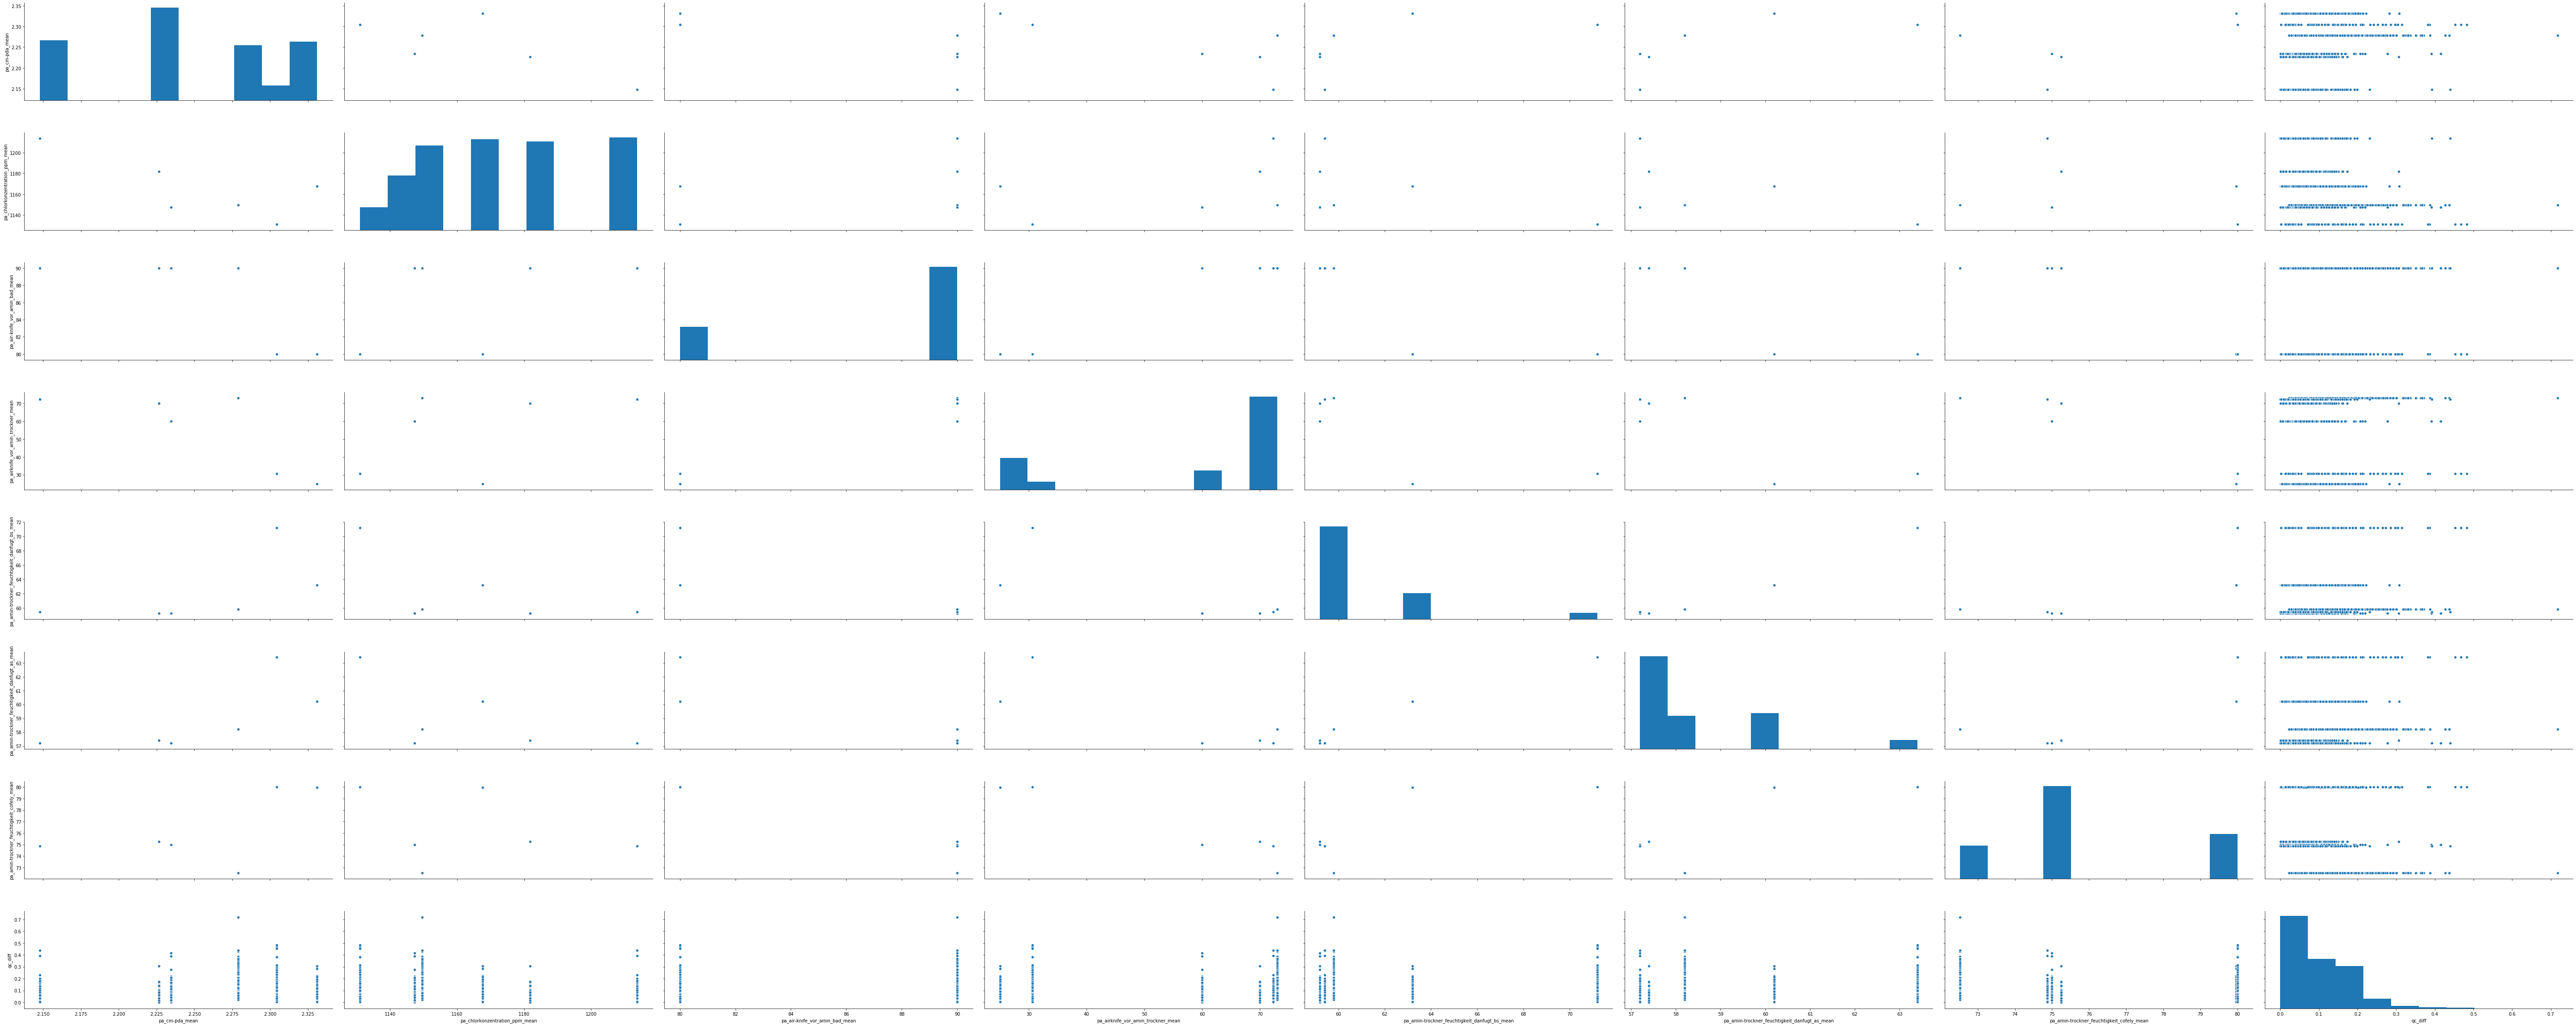

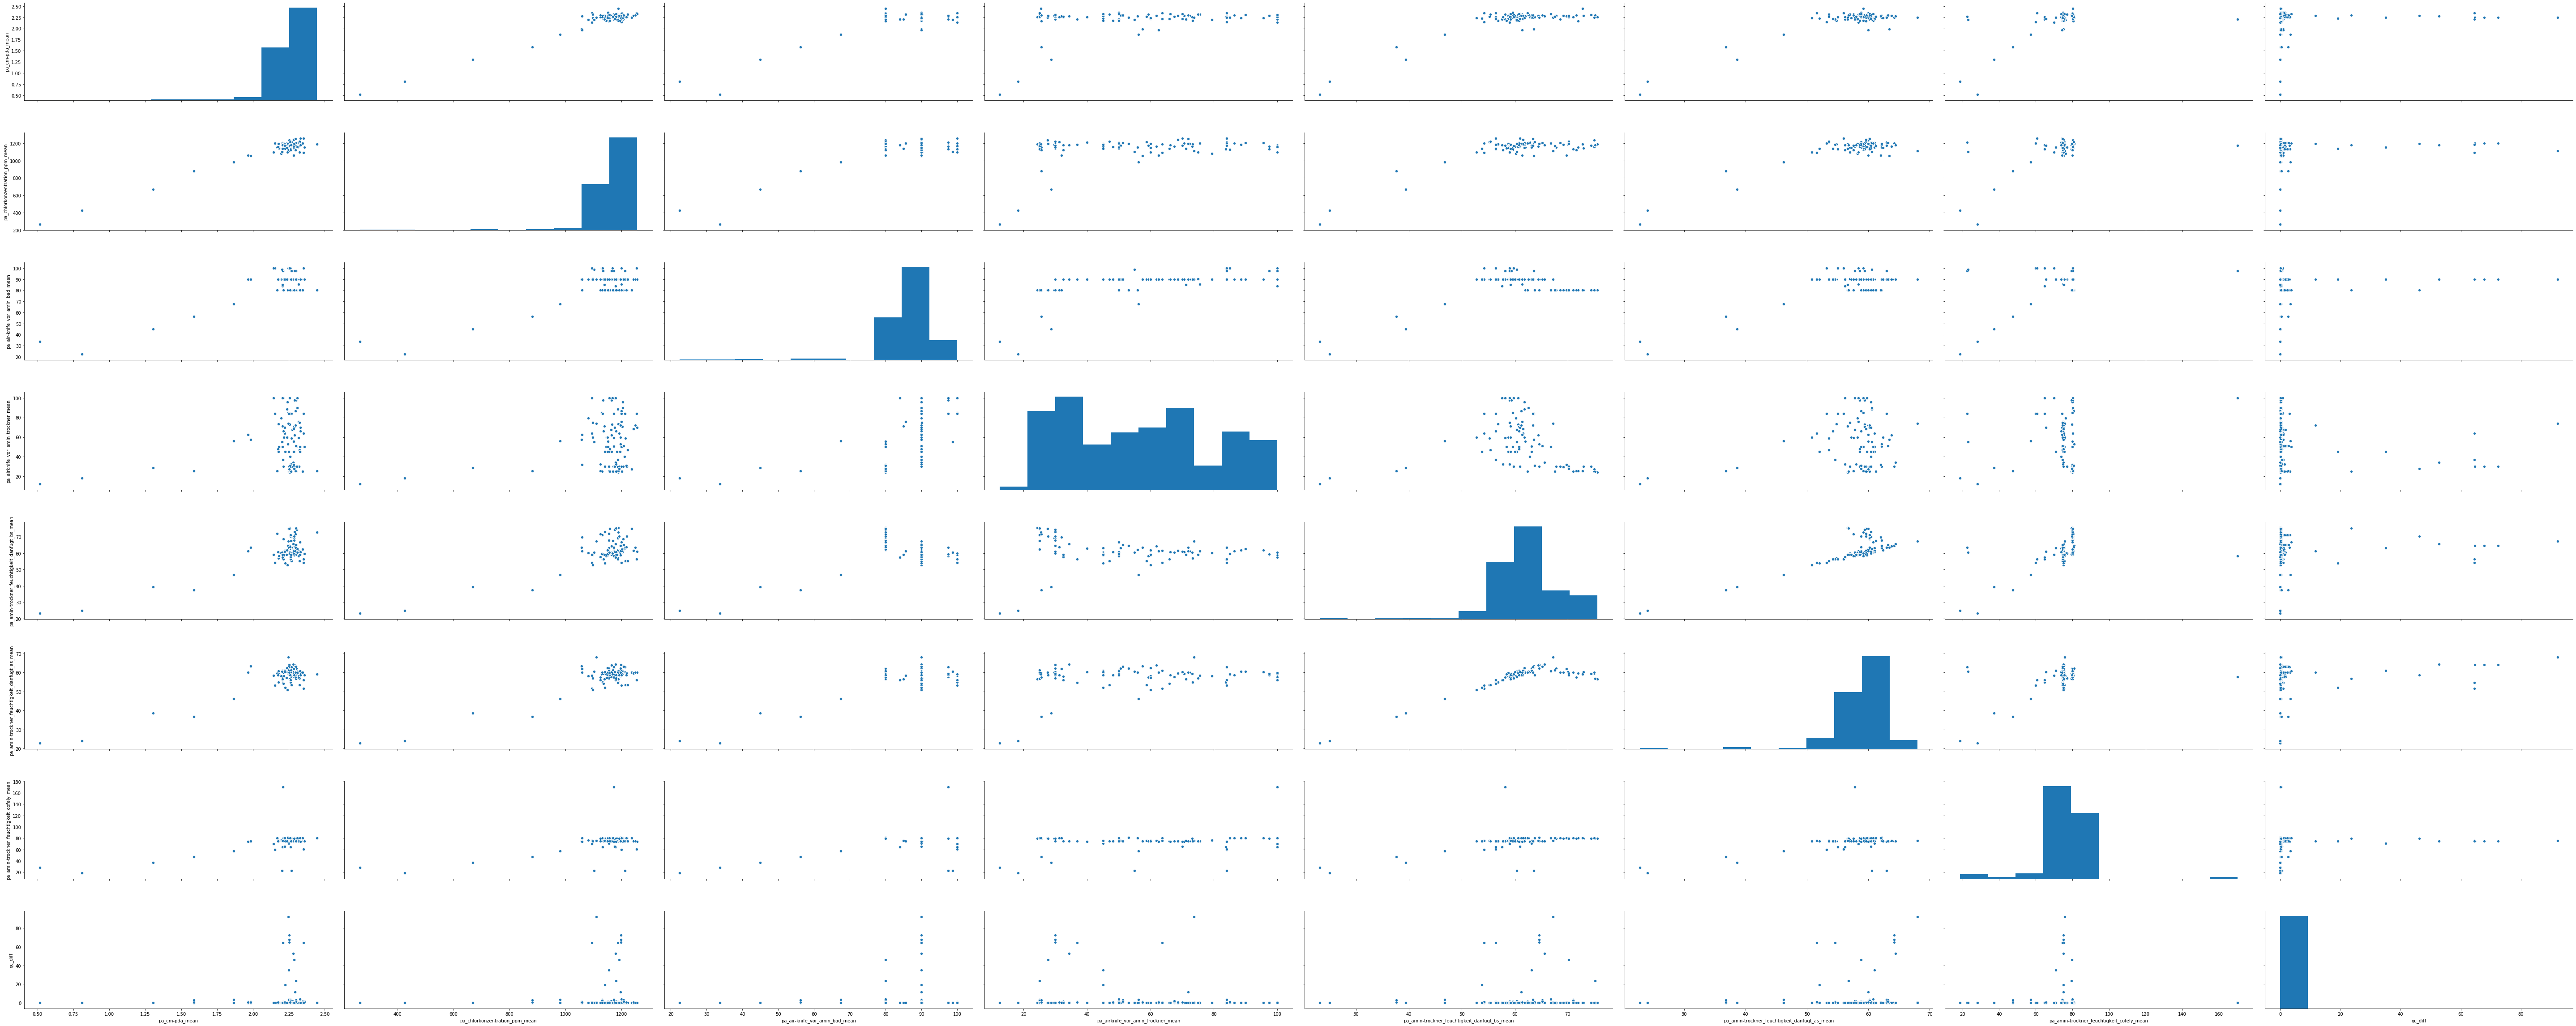

## First attempt of Data Modelling with different linear models

- please run the below code snippets, to see the graphs mentioned
- for further analysis output see the created output.txt files

In [ ]:
# filtering out zero values 
mask = df8['qc_salzrckhalt']!=0
df8 = df8[mask]
df8 = df8.reset_index(drop = True)
df_numeric = df8.select_dtypes(include = ['float64', 'int'])

In [ ]:
# Create feature and target set
targetVariables = ['qc_b-value_m/s_10-6','qc_salzrckhalt',] #'qc_flux_l/m2/h' ,'qc_durchfluss' 'qc_a-value_l/m2/h/bar'
X = df_numeric.drop(targetVariables, axis = 1)
y = (df_numeric['qc_salzrckhalt'])

In [ ]:
# Standardize feature set
import sklearn
from sklearn.preprocessing import StandardScaler

scaled_features = StandardScaler().fit_transform(X.values)
scaled_features_df = pd.DataFrame(scaled_features, index=X.index, columns=X.columns)
X = scaled_features_df

In [ ]:
# import user made function
import linReg
from linReg import LinFunc
LinFunc(X_train,y_train,X_test,y_test,X, y, 'qc_salzrckhalt', 'BayesianRegressor')

In [ ]:
LinFunc(X_train,y_train,X_test,y_test,X, y, 'qc_salzrckhalt', 'RigidRegression')

In [ ]:
LinFunc(X_train,y_train,X_test,y_test,X, y, 'qc_salzrckhalt', 'DecisionTree')

In [ ]:
LinFunc(X_train,y_train,X_test,y_test,X, y, 'qc_salzrckhalt', 'KNeighbors')

In [ ]:
LinFunc(X_train,y_train,X_test,y_test,X, y, 'qc_salzrckhalt', 'SVM')

 - The residual plot of all models show much room for improvement. Although they are symetrical distributed and  clustered around low y-axis values, there are a significant amount of points who are far away
 
- The models predicitions are not good at all.

- The output files need to be examined to make further assumptions or predictions
- The above mentioned x^n relationship should be examined